In [1]:
# ipython
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
import glob
import json
import os
import sys
import json
import os
import sys
import multiprocessing


In [2]:
report_file = "all_reports.csv"

def read_report(x):
    with open(x) as xfp:
        j = json.load(xfp)["frames"][0]["metrics"]
    r = {
        "image": os.path.splitext(os.path.basename(x))[0].replace("encoded_", ""),
        "src": os.path.basename(os.path.dirname(x))
    }
    for k in ["adm2", "ms_ssim", "psnr", "ssim", "vif_scale0", "vif_scale1", "vif_scale2", "vif_scale3", "vmaf"]:
        r[k] = j[k]
    return r


if not os.path.isfile(report_file):
    reports = list(glob.glob("reports/*/*.json"))
    pool = multiprocessing.Pool(multiprocessing.cpu_count())
    res = pool.map(read_report, reports)
    #res = list(map(read_report, reports[0:10]))
    dr = pd.DataFrame(res)
    dr.to_csv(report_file, index=False)

dr = pd.read_csv(report_file)
d(dr.head())


,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717


In [3]:
dr["vmaf_round"] = dr["vmaf"].round(0)
d(dr.head())

,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0


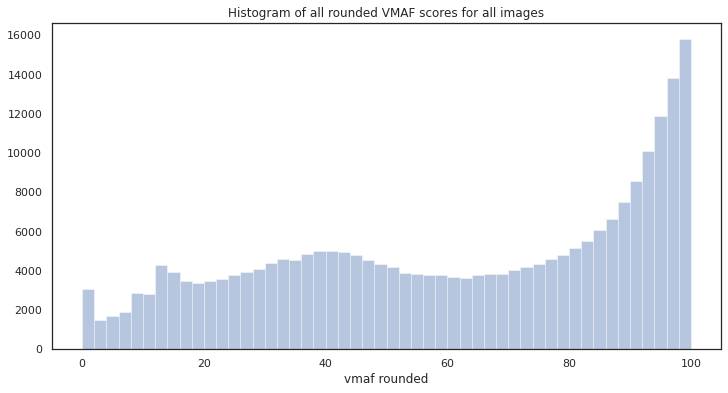

In [4]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")

ax = sns.distplot(dr["vmaf_round"], kde=False, hist=True)
ax.set_title("Histogram of all rounded VMAF scores for all images")
ax.set_xlabel("vmaf rounded")
ax.get_figure().savefig("all_img_vmaf_distplot.pdf", bbox_inches="tight")

In [5]:
def get_crf(x):
    t = x.split("_")
    for i, x in enumerate(t):
        if x == "crf":
            return int(t[i + 1])

def get_height(x):
    t = x.split("_")
    for i, x in enumerate(t):
        if x == "height":
            return int(t[i + 1])
    
dr["crf"] = dr["image"].apply(get_crf)
dr["height"] = dr["image"].apply(get_height)
d(dr)

,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246120,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.97021,0.99483,40.84433,0.99967,0.60658,0.98196,0.99226,0.99568,94.38248,94.0,9,1552
246121,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.85653,0.93881,32.93977,0.98645,0.23650,0.62772,0.77579,0.86234,67.94294,68.0,27,1600
246122,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.86605,0.94419,33.27676,0.98828,0.25037,0.65508,0.79800,0.87910,70.13653,70.0,28,1920
246123,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.49244,0.68165,26.04406,0.74575,0.04025,0.13790,0.19262,0.24435,22.17270,22.0,44,976


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


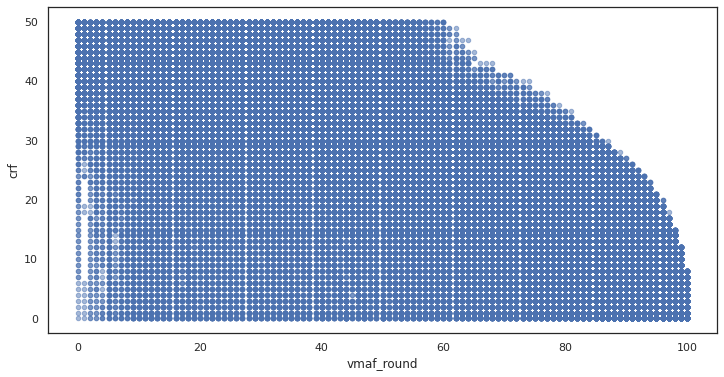

In [6]:
dr.plot(x="vmaf_round", y="crf", kind="scatter", alpha=0.5)

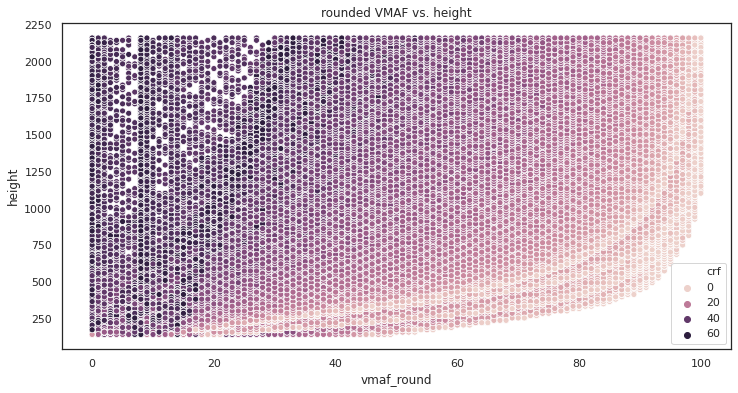

In [7]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")

ax = sns.scatterplot(
    x="vmaf_round", 
    y="height",
    hue="crf", 
    data=dr
)
ax.set_title("rounded VMAF vs. height")
ax.get_figure().savefig("all_img_vmaf_vs_height.pdf", bbox_inches="tight", dpi=400, rasterized=True)

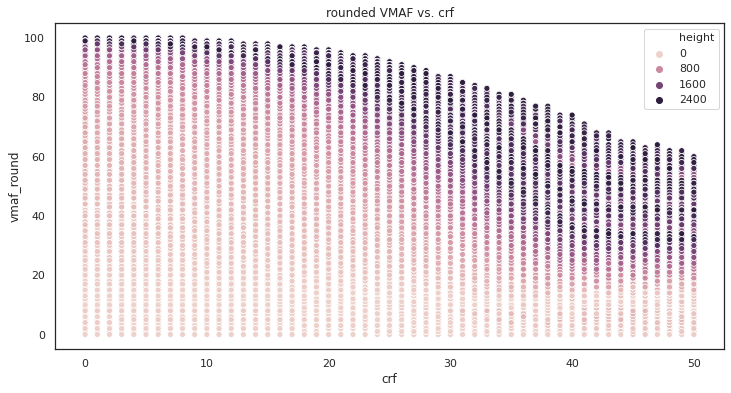

In [8]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")

ax = sns.scatterplot(
    y="vmaf_round", 
    x="crf",
    hue="height", 
    data=dr
)
ax.set_title("rounded VMAF vs. crf")
ax.get_figure().savefig("all_img_vmaf_vs_crf.pdf", bbox_inches="tight", dpi=400, rasterized=True)

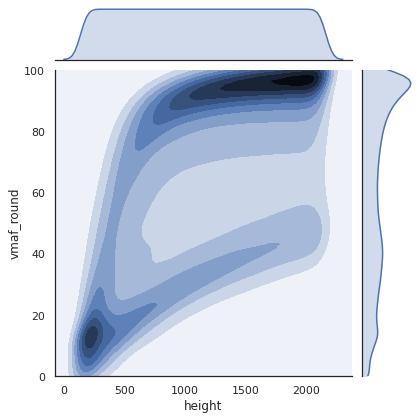

In [9]:
dr["height_log2"] = np.log2(dr["height"])
ax = sns.jointplot(
    y="vmaf_round", 
    x="height", 
    kind="kde",
    data=dr,
    ylim=(0,100)
)

ax.savefig("all_img_kde_vmaf_vs_height.pdf", bbox_inches="tight", dpi=400, rasterized=True)

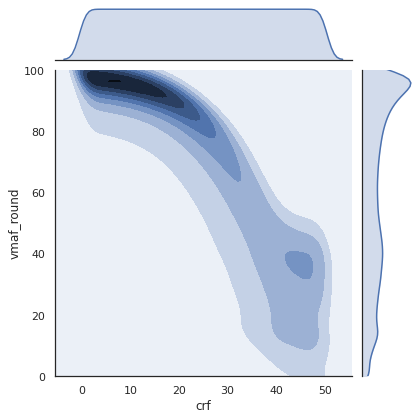

In [10]:
dr["crf_log2"] = np.log2(dr["crf"] + 1)
ax = sns.jointplot(
    y="vmaf_round", 
    x="crf", 
    kind="kde",
    data=dr,
    ylim=(0,100)
)
ax.savefig("all_img_kde_vmaf_vs_crf.pdf", bbox_inches="tight", dpi=400, rasterized=True)

In [11]:
df = pd.read_csv("filesize.csv.gz", header=None, names=["size", "file"], sep="\t")

df["image"] = df["file"].apply(lambda x: os.path.splitext(x)[0].replace("/", "_").replace("encoded_", ""))
d(df)
dk = pd.merge(dr, df, left_on="image", right_on="image")
d(dk.head())
print(len(dk), len(df), len(dr))

,size,file,image
0,11575,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
1,13207,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
2,15271,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
3,16999,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
4,19882,encoded/air_acrobatics_harmonic/air_acrobatics...,air_acrobatics_harmonic_air_acrobatics_harmoni...
...,...,...,...
246121,4644,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...
246122,4679,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...
246123,4785,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...
246124,4722,encoded/weapon8k-standard-60fps-12to1redcode_1...,weapon8k-standard-60fps-12to1redcode_16x9_444_...


,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height,height_log2,crf_log2,size,file
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360,10.409391,3.906891,158662,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128,11.055282,4.392317,146303,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264,10.303781,4.906891,23828,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520,10.569856,5.000000,23871,encoded/Netflix_PierSeaside_4096x2160_60fps_10...
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528,9.044394,5.392317,3624,encoded/Netflix_PierSeaside_4096x2160_60fps_10...


246125 246126 246125


,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height,height_log2,crf_log2,size,file,bpp,bpp_log2
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360,10.409391,3.906891,158662,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.686254,-0.543185
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128,11.055282,4.392317,146303,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.258464,-1.951965
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264,10.303781,4.906891,23828,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.119312,-3.067191
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520,10.569856,5.000000,23871,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.082656,-3.596740
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528,9.044394,5.392317,3624,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.103994,-3.265421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246120,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.97021,0.99483,40.84433,0.99967,0.60658,0.98196,0.99226,0.99568,94.38248,94.0,9,1552,10.599913,3.321928,605392,encoded/red_rocks_harmonic/red_rocks_harmonic....,2.010681,1.007684
246121,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.85653,0.93881,32.93977,0.98645,0.23650,0.62772,0.77579,0.86234,67.94294,68.0,27,1600,10.643856,4.807355,57357,encoded/red_rocks_harmonic/red_rocks_harmonic....,0.179241,-2.480030
246122,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.86605,0.94419,33.27676,0.98828,0.25037,0.65508,0.79800,0.87910,70.13653,70.0,28,1920,10.906891,4.857981,64936,encoded/red_rocks_harmonic/red_rocks_harmonic....,0.140920,-2.827050
246123,red_rocks_harmonic_red_rocks_harmonic.mkv_1fra...,red_rocks_harmonic,0.49244,0.68165,26.04406,0.74575,0.04025,0.13790,0.19262,0.24435,22.17270,22.0,44,976,9.930737,5.491853,4604,encoded/red_rocks_harmonic/red_rocks_harmonic....,0.038666,-4.692803


9.058256172839506 0.008031550068587105


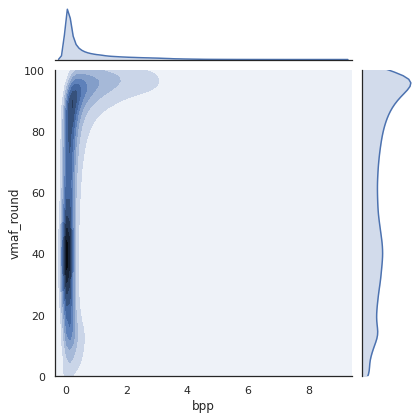

In [12]:
dk["bpp"] =(dk["size"] * 8) / (dk["height"] * dk["height"])
dk["bpp_log2"] =  np.log2(dk["bpp"])
d(dk)
print(dk["bpp"].max(),dk["bpp"].min(),)
ax = sns.jointplot(
    y="vmaf_round", 
    x="bpp", 
    kind="kde",
    data=dk,
    ylim=(0,100),
)
ax.savefig("all_img_kde_vmaf_vs_bpp.pdf", bbox_inches="tight", dpi=400, rasterized=True)

In [13]:
d(dk.head())

,image,src,adm2,ms_ssim,psnr,ssim,vif_scale0,vif_scale1,vif_scale2,vif_scale3,vmaf,vmaf_round,crf,height,height_log2,crf_log2,size,file,bpp,bpp_log2
0,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.96751,0.99178,40.25280,0.99882,0.61134,0.94421,0.97571,0.98723,92.99443,93.0,14,1360,10.409391,3.906891,158662,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.686254,-0.543185
1,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.97314,0.99104,40.61319,0.99847,0.62346,0.92675,0.96549,0.98107,93.35009,93.0,20,2128,11.055282,4.392317,146303,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.258464,-1.951965
2,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87918,0.94319,32.61787,0.98137,0.31993,0.58817,0.70784,0.79730,66.98534,67.0,29,1264,10.303781,4.906891,23828,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.119312,-3.067191
3,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.87774,0.94141,32.53714,0.98022,0.31810,0.58084,0.70083,0.79139,66.51813,67.0,31,1520,10.569856,5.000000,23871,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.082656,-3.596740
4,Netflix_PierSeaside_4096x2160_60fps_10bit_420_...,Netflix_PierSeaside_4096x2160_60fps_10bit_420,0.44623,0.71521,24.70304,0.76469,0.13069,0.21243,0.26210,0.31439,11.99717,12.0,41,528,9.044394,5.392317,3624,encoded/Netflix_PierSeaside_4096x2160_60fps_10...,0.103994,-3.265421


In [14]:
corr = []
dk["size_log2"] = np.log2(dk["size"])

for x in ["bpp_log2", "height_log2", "crf_log2", "bpp", "height", "crf", "size", "size_log2"]:
    c = {"vmaf_round": x}
    for m in ["pearson", "kendall", "spearman"]:
        c[m] = dk[[x, "vmaf_round"]].corr(method=m)[x][-1]
    corr.append(c)

dc = pd.DataFrame(corr)
dc["abs_pearson"] = np.abs(dc["pearson"])

dc = dc.sort_values(by="abs_pearson", ascending=False).round(2)
d(dc)
print(dc.to_latex(index=False))

,vmaf_round,pearson,kendall,spearman,abs_pearson
7,size_log2,0.85,0.73,0.90,0.85
5,crf,-0.73,-0.58,-0.75,0.73
2,crf_log2,-0.61,-0.58,-0.75,0.61
1,height_log2,0.58,0.39,0.54,0.58
4,height,0.53,0.39,0.54,0.53
6,size,0.52,0.73,0.90,0.52
0,bpp_log2,0.40,0.31,0.45,0.40
3,bpp,0.29,0.31,0.45,0.29


\begin{tabular}{lrrrr}
\toprule
  vmaf\_round &  pearson &  kendall &  spearman &  abs\_pearson \\
\midrule
   size\_log2 &     0.85 &     0.73 &      0.90 &         0.85 \\
         crf &    -0.73 &    -0.58 &     -0.75 &         0.73 \\
    crf\_log2 &    -0.61 &    -0.58 &     -0.75 &         0.61 \\
 height\_log2 &     0.58 &     0.39 &      0.54 &         0.58 \\
      height &     0.53 &     0.39 &      0.54 &         0.53 \\
        size &     0.52 &     0.73 &      0.90 &         0.52 \\
    bpp\_log2 &     0.40 &     0.31 &      0.45 &         0.40 \\
         bpp &     0.29 &     0.31 &      0.45 &         0.29 \\
\bottomrule
\end{tabular}



In [21]:
# split data into train and validation
srcs = list(set(dk["src"].values))
dk["train"] = dk["src"].apply(lambda x: x in srcs[0:len(srcs)//2])
train = dk[dk["train"]].copy()
val = dk[dk["train"] == False].copy()
d(len(train), len(val))

print(train.columns)

123062

123063

Index(['image', 'src', 'adm2', 'ms_ssim', 'psnr', 'ssim', 'vif_scale0',
       'vif_scale1', 'vif_scale2', 'vif_scale3', 'vmaf', 'vmaf_round', 'crf',
       'height', 'height_log2', 'crf_log2', 'size', 'file', 'bpp', 'bpp_log2',
       'size_log2', 'train'],
      dtype='object')


In [102]:
from scipy.optimize import curve_fit
# parametric model:

def model(X, a, b, c, d):
    lsize = X[:,0]
    lheight = X[:,1]
    return  a * lsize *lheight + b* lsize + c*lheight + d 

X = train[["size_log2", "height_log2"]].values
Y = train["vmaf"].values
#print(X)
popt, pcov = curve_fit(model, X, Y)
print(popt, pcov)

predicted = model(val[["size_log2", "height_log2"]].values, *popt).clip(0, 100)

dmodel = pd.DataFrame({"truth": val["vmaf"].values, "predicted": predicted})

model_corrs = []
c = {
    "model": "IMG-h265-para"
}
for m in ["pearson", "kendall", "spearman"]:
    c[m] = dmodel[["truth", "predicted"]].corr(method=m)["truth"][-1]


from sklearn.metrics import mean_squared_error

def rmse(data, X, Y):
    """ rmse caluclation

    Parameters
    ----------
    data : pandas dataframe
        stores all data
    X : str
        X column to be used
    Y : str
        Y column to be used
    """
    assert X in data and Y in data
    return np.sqrt(mean_squared_error(data[X], data[Y]))



c["rmse"] = rmse(dmodel, "truth", "predicted")

model_corrs.append(c)

        

[  -1.21595299   21.55901861   23.6158313  -314.1203701 ] [[ 4.86237878e-04 -4.99078643e-03 -6.58205198e-03  6.72651065e-02]
 [-4.99078643e-03  5.15877296e-02  6.71475889e-02 -6.91712106e-01]
 [-6.58205198e-03  6.71475889e-02  9.14180882e-02 -9.27418137e-01]
 [ 6.72651065e-02 -6.91712106e-01 -9.27418137e-01  9.49344935e+00]]


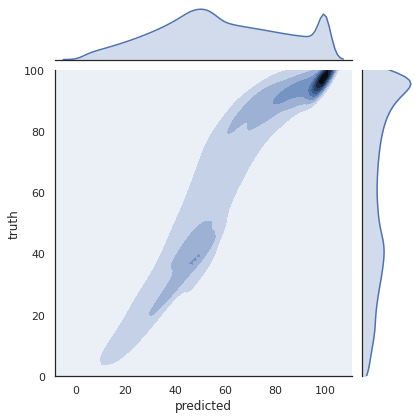

In [103]:
ax = sns.jointplot(
    y="truth", 
    x="predicted", 
    kind="kde",
    data=dmodel,
    ylim=(0,100)
)


ax.savefig("model_IMG-h265-para.pdf", bbox_inches="tight", dpi=400, rasterized=True)


In [104]:
from sklearn.ensemble import RandomForestRegressor

train["size*height"] = train.apply(lambda x: x["size_log2"] * x["height_log2"], axis=1) 
X = train[["size_log2", "height_log2", "size*height"]].values
Y = train["vmaf"].values

model = RandomForestRegressor(n_jobs=-1, criterion="mse")
model.fit(X, Y)

<ipython-input-104-d5b3ac39fa58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["size*height"] = train.apply(lambda x: x["size_log2"] * x["height_log2"], axis=1)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [111]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_est

In [106]:

val["size*height"] = val.apply(lambda x: x["size_log2"] * x["height_log2"], axis=1) 

X_val = val[["size_log2", "height_log2", "size*height"]].values
Y_val = val["vmaf"].values

rf_pred = model.predict(X_val).clip(0, 100)

c = {
    "model": "IMG-h265-rf"
}
drf = pd.DataFrame({"truth": Y_val, "predicted": rf_pred})

for m in ["pearson", "kendall", "spearman"]:
    c[m] = drf[["truth", "predicted"]].corr(method=m)["truth"][-1]

c["rmse"] = rmse(dmodel, "truth", "predicted")


model_corrs.append(c)


<ipython-input-106-c368826408bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["size*height"] = val.apply(lambda x: x["size_log2"] * x["height_log2"], axis=1)


In [108]:

dmodel_corr = pd.DataFrame(model_corrs).round(3)
d(dmodel_corr)

print(dmodel_corr.to_latex(index=False))

,model,pearson,kendall,spearman,rmse
0,IMG-h265-para,0.913,0.772,0.931,12.52
1,IMG-h265-rf,0.913,0.755,0.922,12.52


\begin{tabular}{lrrrr}
\toprule
         model &  pearson &  kendall &  spearman &   rmse \\
\midrule
 IMG-h265-para &    0.913 &    0.772 &     0.931 &  12.52 \\
   IMG-h265-rf &    0.913 &    0.755 &     0.922 &  12.52 \\
\bottomrule
\end{tabular}



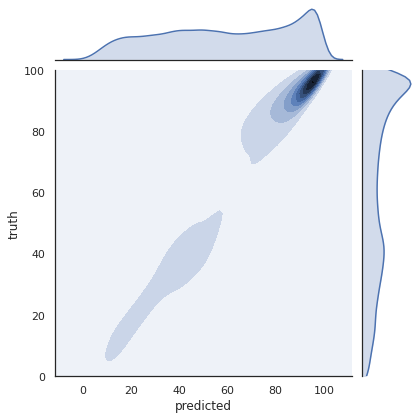

In [110]:
ax = sns.jointplot(
    y="truth", 
    x="predicted", 
    kind="kde",
    data=drf,
    ylim=(0,100)
)


ax.savefig("model_IMG-h265-rf.pdf", bbox_inches="tight", dpi=400, rasterized=True)
